In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sns


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
file_path = '/content/drive/MyDrive/shp_countries/Pertanian.xlsx'

df = pd.read_excel(file_path, sheet_name='Gabungan', index_col='Lokasi')

df


,Luas Panen 2010,Luas Panen 2011,2012,2013,2014,Luas Panen 2015,Luas Panen 2016,Luas Panen 2017,Luas Panen 2018,Luas Panen 2019,...,Produktivitas 2015,Produktivitas 2016,Produktivitas 2017,Produktivitas 2018,Produktivitas 2019,Produktivitas 2020,Produktivitas 2021,Produktivitas 2022,Produktivitas 2023,Produktivitas 2024
Lokasi,,,,,,,,,,,,,,,,,,,,,
1101 - Kab. Simeulue,0,0,0,0,0,14,23,0,26,26.0,...,0.000000,3.565217,0.000000,2.23,2.69,3.20,3.00,2.97,21.74,0
1102 - Kab. Aceh Singkil,0,0,0,0,0,39,42,0,40,32.0,...,0.000000,7.880952,0.000000,23.25,28.97,10.29,37.48,64.87,173.27,0
1103 - Kab. Aceh Selatan,0,0,0,0,0,157,76,0,59,67.0,...,0.000000,8.381579,0.000000,20.86,34.73,38.04,27.29,31.51,25.88,0
1104 - Kab. Aceh Tenggara,0,0,0,0,0,25,16,0,18,13.0,...,0.000000,62.937500,0.000000,200.61,301.77,207.36,107.40,74.33,66.50,0
1105 - Kab. Aceh Timur,0,0,0,0,0,155,147,0,84,42.0,...,0.000000,21.142857,0.000000,21.70,24.64,26.74,23.12,31.50,22.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9434 - Kab. Dogiyai,0,0,0,0,0,0,0,0,0,0.0,...,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0
9435 - Kab. Intan Jaya,0,0,0,0,0,0,0,0,0,0.0,...,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0
9436 - Kab. Deiyai,0,0,0,0,0,0,0,0,0,0.0,...,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0


In [5]:
df_numerik = df.select_dtypes(include='number')

if df_numerik.empty:
    print("Tidak ada kolom numerik yang bisa digunakan untuk clustering.")
else:
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score, davies_bouldin_score
    import time

    df_numerik.columns = df_numerik.columns.astype(str)

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    df_numerik_scaled = scaler.fit_transform(df_numerik)

    start_time = time.time()

    kmeans_model = KMeans(n_clusters=3, n_init=10, random_state=42)
    labels = kmeans_model.fit_predict(df_numerik_scaled)

    waktu_komputasi = time.time() - start_time

    silhouette_avg = silhouette_score(df_numerik_scaled, labels)
    dbi = davies_bouldin_score(df_numerik_scaled, labels)

    print("Rata-rata nilai Silhouette =", silhouette_avg)
    print("Rata-rata nilai DBI =", dbi)
    print("Waktu komputasi =", waktu_komputasi, "detik")

    df['Cluster'] = labels

Rata-rata nilai Silhouette = 0.721193838306942
Rata-rata nilai DBI = 1.3329915945085893
Waktu komputasi = 0.2736232280731201 detik


In [6]:
#Menggabungkan label cluster ke dataset
df['Cluster'] = labels

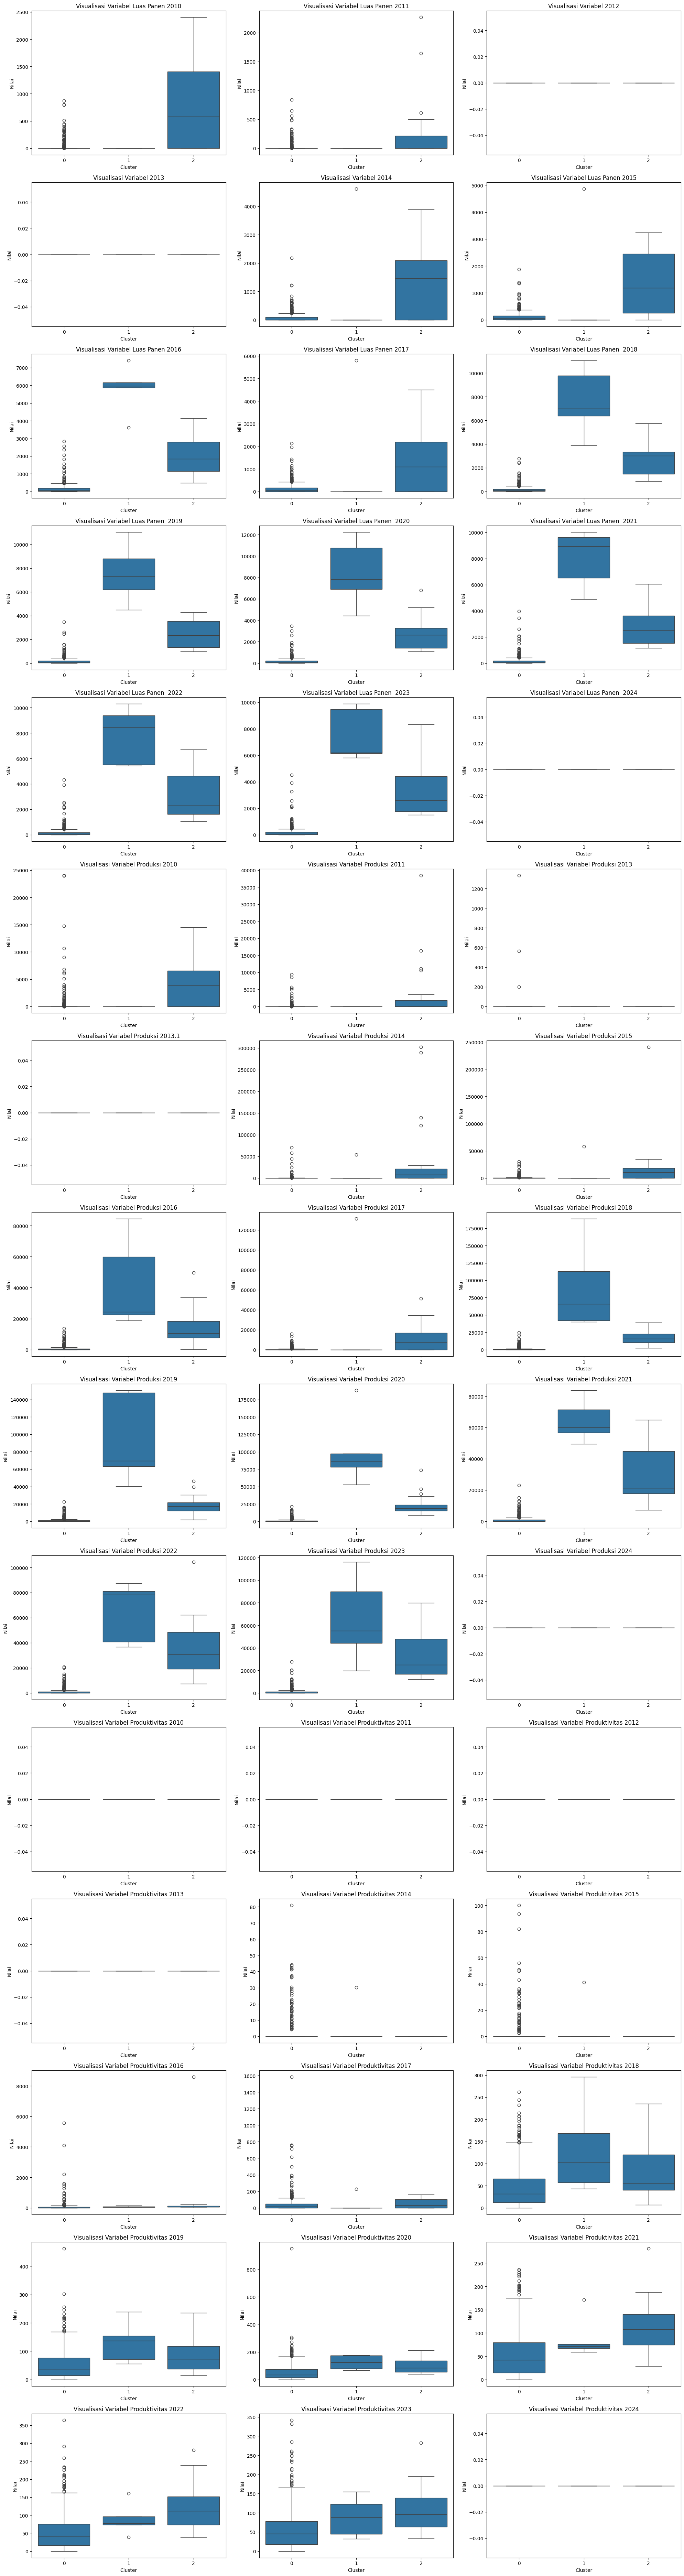

In [7]:
numerik_cols = df.select_dtypes(include='number').columns.drop('Cluster') if 'Cluster' in df.columns else df.select_dtypes(include='number').columns

num_plots = len(numerik_cols)
rows = (num_plots + 2) // 3

fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(20, 5*rows))
axes = axes.flatten()

for i, col in enumerate(numerik_cols):
    if i < len(axes):
        sns.boxplot(x=df['Cluster'], y=df[col], data=df, ax=axes[i])
        axes[i].set_title(f'Visualisasi Variabel {str(col)}')
        axes[i].set_xlabel('Cluster')
        axes[i].set_ylabel('Nilai')

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

gdf = gpd.read_file("/content/drive/MyDrive/ML/gadm41_IDN_2.shp")

df_reset = df.reset_index()

kamus_penyesuaian = {
    "Daerah Khusus Ibukota Jakarta":"Jakarta Raya",
    "Kepulauan Bangka Belitung": "Bangka Belitung",
    "Daerah Istimewa Yogyakarta": "Yogyakarta",
}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df_reset['Lokasi'] = df_reset['Lokasi'].replace(kamus_penyesuaian)

data_clustering = df_reset[['Lokasi', 'Cluster']].rename(columns={'Lokasi': 'provinsi'})

gdf_provinsi = gdf.dissolve(by='NAME_2')

gdf_provinsi = gdf_provinsi.merge(data_clustering, left_on='NAME_2', right_on='provinsi', how='left')

color_map = {0: 'red', 1: 'blue', 2: 'green'}
gdf_provinsi['color'] = gdf_provinsi['Cluster'].map(color_map)

gdf_provinsi['color'] = gdf_provinsi['color'].fillna('lightgrey')

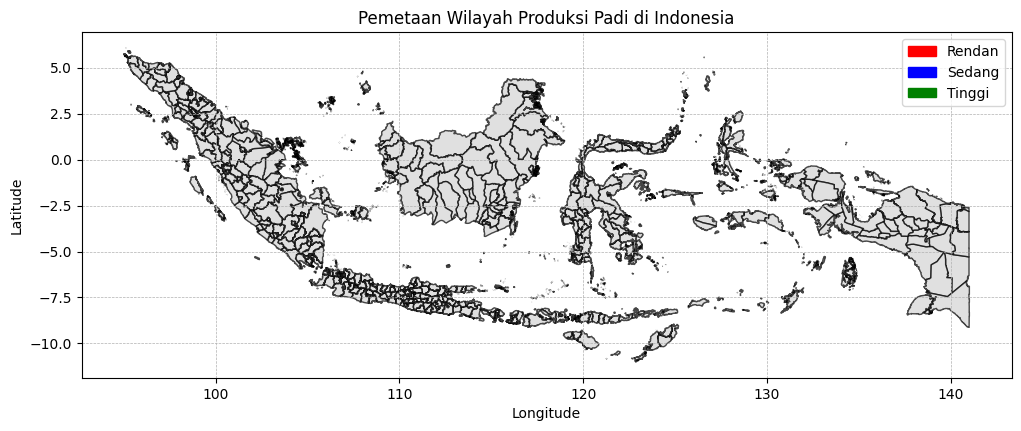

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf_provinsi.plot(ax=ax, color=gdf_provinsi['color'], alpha=0.7, edgecolor='black')

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Rendan')
blue_patch = mpatches.Patch(color='blue', label='Sedang')
green_patch = mpatches.Patch(color='green', label='Tinggi')
plt.legend(handles=[red_patch, blue_patch, green_patch], loc='upper right')

plt.title("Pemetaan Wilayah Produksi Padi di Indonesia")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [11]:
pip install fuzzy-c-means

  Using cached tabulate-0.8.10-py3-none-any.whl.metadata (25 kB)
Using cached tabulate-0.8.10-py3-none-any.whl (29 kB)
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.4.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.


In [12]:
!pip install --upgrade tabulate

  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.8.10
    Uninstalling tabulate-0.8.10:
      Successfully uninstalled tabulate-0.8.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fuzzy-c-means 1.7.2 requires tabulate<0.9.0,>=0.8.9, but you have tabulate 0.9.0 which is incompatible.


Hasil Perbandingan K-Means dan Fuzzy C-Means:
|   Jumlah Cluster |   K-Means Silhouette |   K-Means DBI |   K-Means Waktu |   FCM Silhouette |   FCM DBI |   FCM Waktu |
|-----------------:|---------------------:|--------------:|----------------:|-----------------:|----------:|------------:|
|                2 |             0.759299 |       1.12732 |       0.09429   |        0.478086  |   1.81094 |    0.148911 |
|                3 |             0.733227 |       1.29309 |       0.0669289 |        0.327214  |   1.48409 |    0.132453 |
|                4 |             0.388318 |       1.48876 |       0.0621204 |        0.183895  |   1.99795 |    0.162182 |
|                5 |             0.391503 |       1.32504 |       0.0933402 |        0.163187  |   2.75581 |    0.283216 |
|                6 |             0.392657 |       1.10862 |       0.116839  |        0.132877  |   2.99514 |    0.346059 |
|                7 |             0.378205 |       1.1924  |       0.0928795 |        0.113625

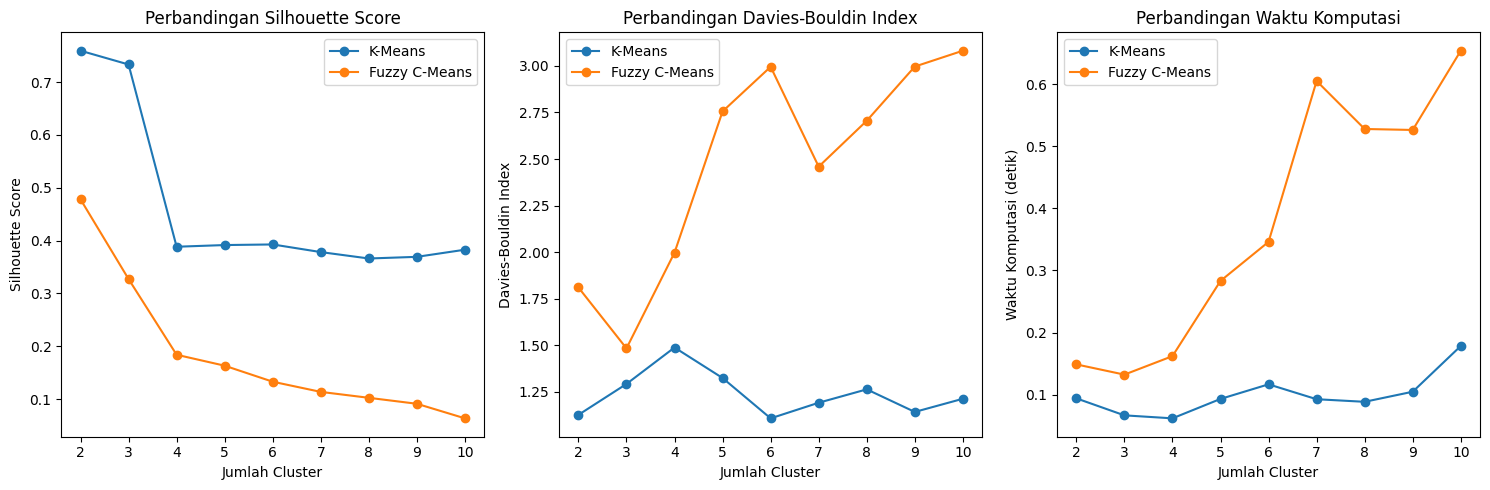

In [13]:
import time
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from fcmeans import FCM
import matplotlib.pyplot as plt

def evaluate_clustering(X, labels):
    silhouette = silhouette_score(X, labels)
    dbi = davies_bouldin_score(X, labels)
    return silhouette, dbi

def run_kmeans(X, n_clusters):
    start_time = time.time()
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X)
    elapsed_time = time.time() - start_time
    silhouette, dbi = evaluate_clustering(X, labels)
    return silhouette, dbi, elapsed_time

def run_fcm(X, n_clusters):
    start_time = time.time()
    fcm = FCM(n_clusters=n_clusters, random_state=42)
    fcm.fit(X.values)
    labels = fcm.predict(X.values)
    elapsed_time = time.time() - start_time
    silhouette, dbi = evaluate_clustering(X, labels)
    return silhouette, dbi, elapsed_time

df_numeric = df.select_dtypes(include='number')

if df_numeric.empty:
    print("Tidak ada kolom numerik yang bisa digunakan untuk clustering.")
else:
    df_numeric.columns = df_numeric.columns.astype(str)

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()

    try:
        X_scaled = scaler.fit_transform(df_numeric)
        X_scaled = pd.DataFrame(X_scaled, columns=df_numeric.columns, index=df_numeric.index)
    except Exception as e:
        print(f"Error saat normalisasi data: {str(e)}")
        X_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), index=df_numeric.index)

    cluster_range = range(2, 11)

    results = pd.DataFrame(columns=['Jumlah Cluster',
                                   'K-Means Silhouette', 'K-Means DBI', 'K-Means Waktu',
                                   'FCM Silhouette', 'FCM DBI', 'FCM Waktu'])

    for n_clusters in cluster_range:
        try:
            km_silhouette, km_dbi, km_time = run_kmeans(X_scaled, n_clusters)
        except Exception as e:
            print(f"Error K-Means dengan {n_clusters} cluster: {str(e)}")
            km_silhouette, km_dbi, km_time = np.nan, np.nan, np.nan

        try:
            fcm_silhouette, fcm_dbi, fcm_time = run_fcm(X_scaled, n_clusters)
        except Exception as e:
            print(f"Error FCM dengan {n_clusters} cluster: {str(e)}")
            fcm_silhouette, fcm_dbi, fcm_time = np.nan, np.nan, np.nan

        results.loc[len(results)] = [n_clusters,
                                    km_silhouette, km_dbi, km_time,
                                    fcm_silhouette, fcm_dbi, fcm_time]

    print("Hasil Perbandingan K-Means dan Fuzzy C-Means:")
    print(results.to_markdown(index=False))

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(cluster_range, results['K-Means Silhouette'], 'o-', label='K-Means')
    plt.plot(cluster_range, results['FCM Silhouette'], 'o-', label='Fuzzy C-Means')
    plt.xlabel('Jumlah Cluster')
    plt.ylabel('Silhouette Score')
    plt.title('Perbandingan Silhouette Score')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(cluster_range, results['K-Means DBI'], 'o-', label='K-Means')
    plt.plot(cluster_range, results['FCM DBI'], 'o-', label='Fuzzy C-Means')
    plt.xlabel('Jumlah Cluster')
    plt.ylabel('Davies-Bouldin Index')
    plt.title('Perbandingan Davies-Bouldin Index')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(cluster_range, results['K-Means Waktu'], 'o-', label='K-Means')
    plt.plot(cluster_range, results['FCM Waktu'], 'o-', label='Fuzzy C-Means')
    plt.xlabel('Jumlah Cluster')
    plt.ylabel('Waktu Komputasi (detik)')
    plt.title('Perbandingan Waktu Komputasi')
    plt.legend()

    plt.tight_layout()
    plt.show()